In [1]:
from PIL import Image
import numpy as np

In [2]:
def dither_matrix(n:int):
    if n == 1:
        return np.array([[0]])
    else:
        first = (n ** 2) * dither_matrix(int(n/2))
        second = (n ** 2) * dither_matrix(int(n/2)) + 2
        third = (n ** 2) * dither_matrix(int(n/2)) + 3
        fourth = (n ** 2) * dither_matrix(int(n/2)) + 1
        first_col = np.concatenate((first, third), axis=0)
        second_col = np.concatenate((second, fourth), axis=0)
        return (1/n**2) * np.concatenate((first_col, second_col), axis=1)
        

In [3]:
def get_image(src:str):
    img = np.array(Image.open(src))
    img_arr = [[(j[0] * 299/1000) + (j[1] * 587/1000) + (j[2] * 114/1000) for j in r] for r in img]
    img_gray = np.array(img_arr)
    Image.fromarray(img_gray).convert('L').save('gray-scale.png')
    return img_gray * (1/255)

In [4]:
def ordered_dithering(img_pixel:np.array, dither_m:np.array):
    n = np.size(dither_m, axis=0)
    x_max = np.size(img_pixel, axis=1)
    y_max = np.size(img_pixel, axis=0)
    for x in range(x_max):
        for y in range(y_max):
            i = x % n
            j = y % n
            if img_pixel[y][x] > dither_m[i][j]:
                img_pixel[y][x] = 255
            else:
                img_pixel[y][x] = 0

    Image.fromarray(img_pixel).convert('L').save('dithered.png', bit=1)

In [5]:
if __name__ == '__main__':
    n = int(input('Enter size of dither matrix:'))
    src = input('Enter source or name of your image:')
    dm = dither_matrix(n)
    img = get_image(src)
    ordered_dithering(img, dm)

Enter size of dither matrix:4
Enter source or name of your image:/content/smpimg.jpg


In [6]:
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
from skimage.io import imshow, imread
from google.colab import files
from IPython.display import Image


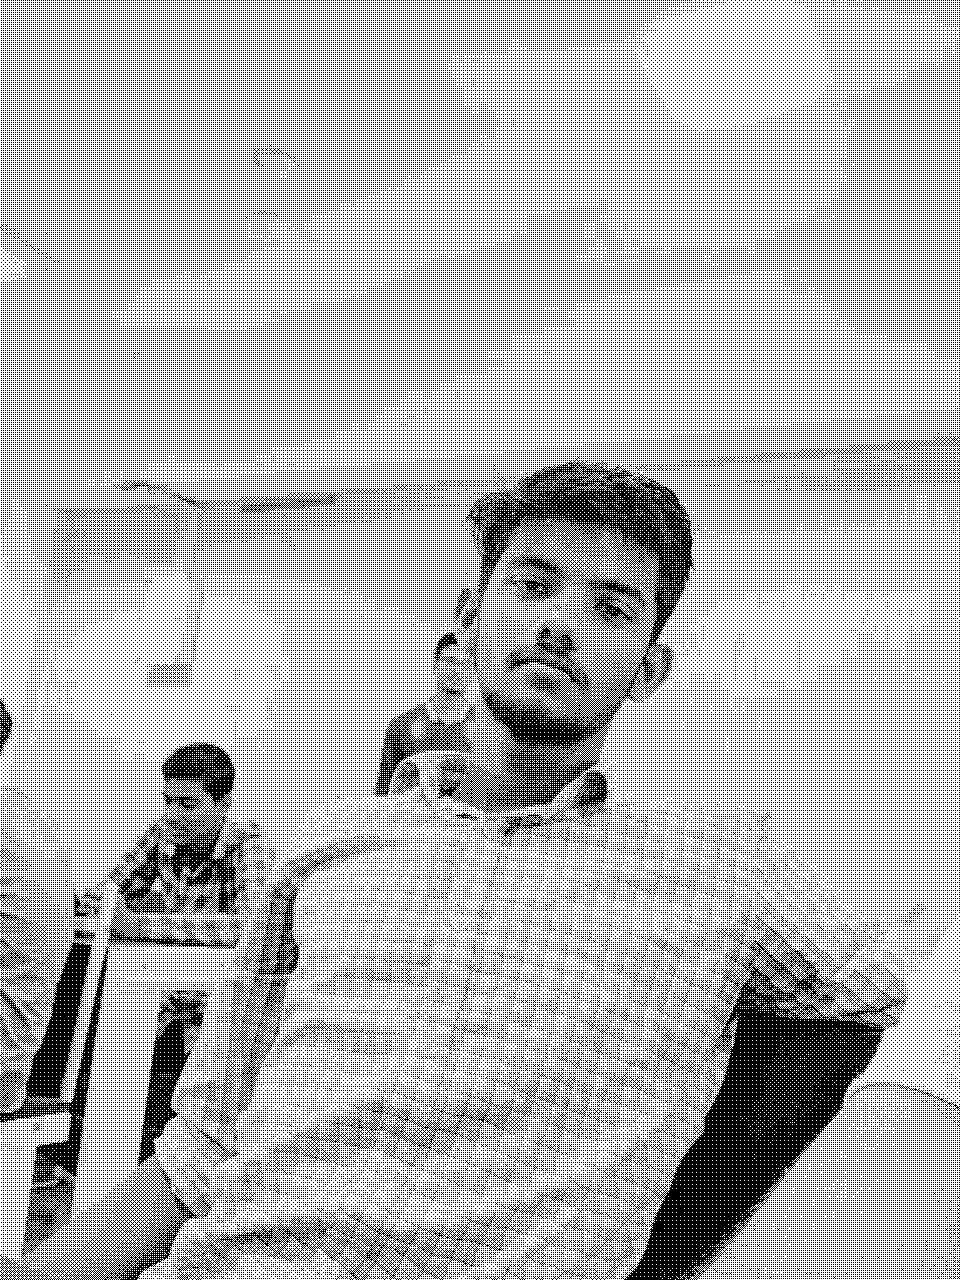

In [7]:
ditheredimage = io.imread("dithered.png")
cv2_imshow(ditheredimage)
